In [1]:
from dspn_analysis import dSPNanalysis

dl = dSPNanalysis('dspn/str-dspn-e150602_c1_D1-mWT-0728MSN01-v20210212/dopamine/')
dl.load()

In [2]:
criteria ={ "selection" : \
           {"mean" : 6.44,\
            "std" : 0.89,\
            "threshold":1.5},\
           "parameters" : { "tstart":200,\
                           "tstop": 700}}
dl.zscore_analysis(criteria=criteria)


In [3]:
criteria = {"tstart":200,"tstop": 700}

dl.frequency_analysis_all(criteria=criteria)


In [4]:
criteria = {"tstart":200,"tstop": 700}

dl.frequency_analysis(criteria=criteria)
dl.frequency_analysis_control(criteria=criteria)



In [5]:
from neuromodulation.experimental_data import experimental
        

In [6]:
dSPNmodulation = experimental()
dSPNmodulation.define_exp(control = { "mean" : 3.56*2, "std" : 0.88})
dSPNmodulation.define_exp(modulated = { "mean" : 10.00*2, "std" : 4.73})
dSPNmodulation.define_exp(control_sim = [dl.frequency_control])
dSPNmodulation.define_exp(modulated_sim = [dl.frequency])


<IPython.core.display.Javascript object>


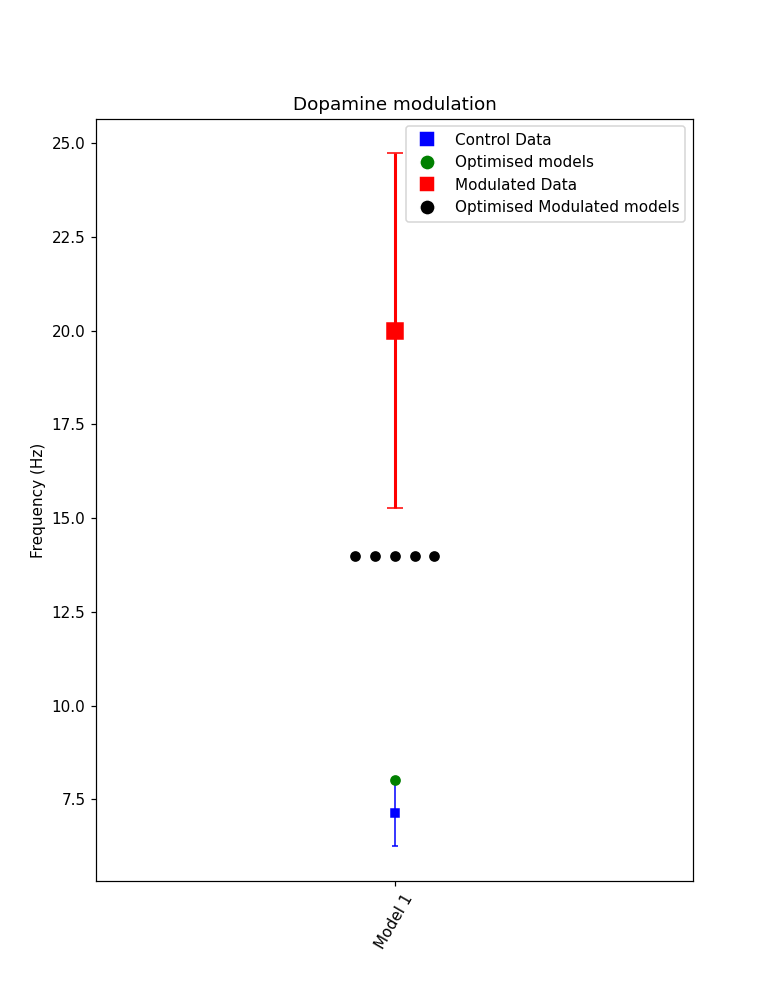

[14. 14. 14. 14. 14.]


/home/jofrony/miniconda3/envs/py37/lib/python3.7/site-packages/neuromodulation/plotting.py:75: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "papertype" which is no longer supported as of 3.3 and will become an error two minor releases later
  frameon=None, metadata=None)
/home/jofrony/miniconda3/envs/py37/lib/python3.7/site-packages/neuromodulation/plotting.py:75: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "frameon" which is no longer supported as of 3.3 and will become an error two minor releases later
  frameon=None, metadata=None)


In [9]:
%matplotlib notebook

dl.plot_comparison_lts(dSPNmodulation.experimental_data['control'],dSPNmodulation.experimental_data['control_sim'],dSPNmodulation.experimental_data['modulated'], dSPNmodulation.experimental_data['modulated_sim'],x_ticks=['Model 1'],ylabel='Frequency (Hz)',title='Dopamine modulation',num_models=1,save=True,filename='model_1.pdf' )

In [8]:
dl.frequency_control

[array(8.) * 1/s]